# Importing Necessary Libraries:

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import \
classification_report,confusion_matrix,precision_score,recall_score
import warnings
warnings.simplefilter("ignore")

# Loading Dataset:

In [81]:
Diabetes_df = pd.read_csv('diabetes (1).csv')
Diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA Analysis:

### Dataframe Shape:

In [6]:
Diabetes_df.shape

(768, 9)

- There are in total 9 columns out of which 8 are 'feature vectors' and 1 in 'Target Column'!
- There are in total 768 instances!

### Dataframe information:

In [7]:
print(Diabetes_df.info())
print(Diabetes_df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
Bloo

- Since 'mean' of the different variables differ a lot so we need to scale the data!
- All the columns in the dataframe is either 'int64' or 'float64'!

### Null values:

In [8]:
Diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Value counts od two classes in the 'Target Variable':

In [9]:
Diabetes_df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

- From above we get to know that that the 'Target variable' is unbalanced!

# 2.Graphical Analysis:

## 2.1 Countplot of target variable:

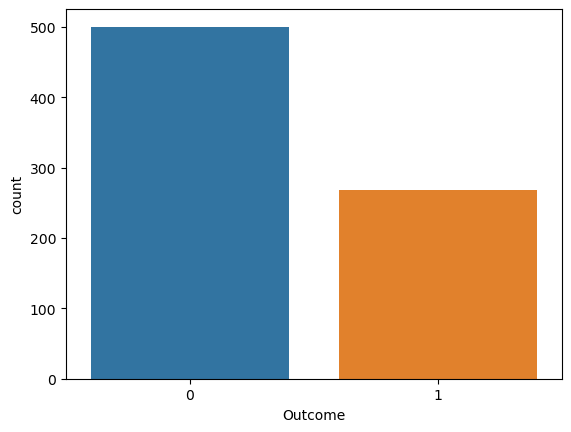

In [10]:
sns.countplot(data=Diabetes_df,x='Outcome')
plt.show()

## 2.2 Distribution of Features:

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


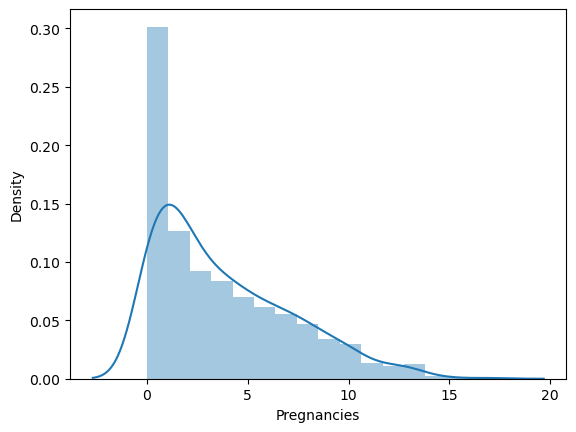

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


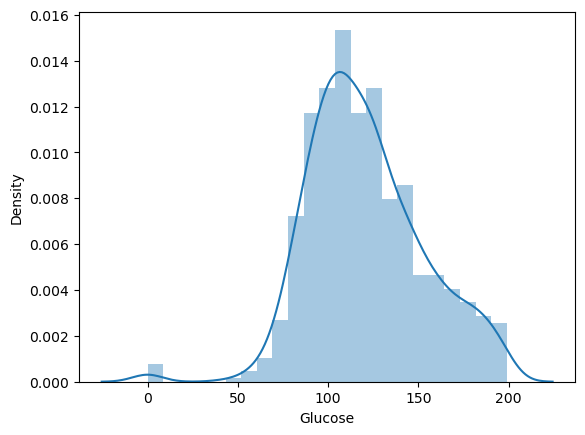

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


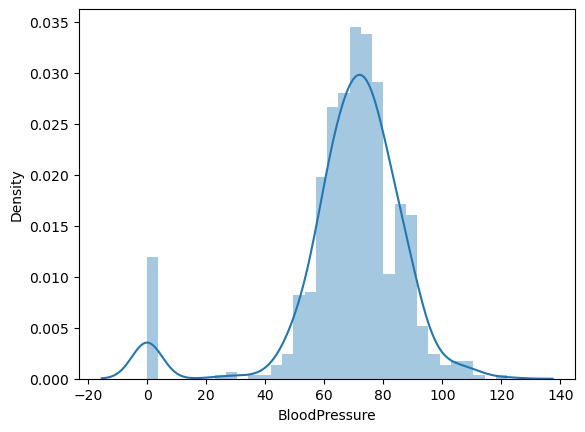

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


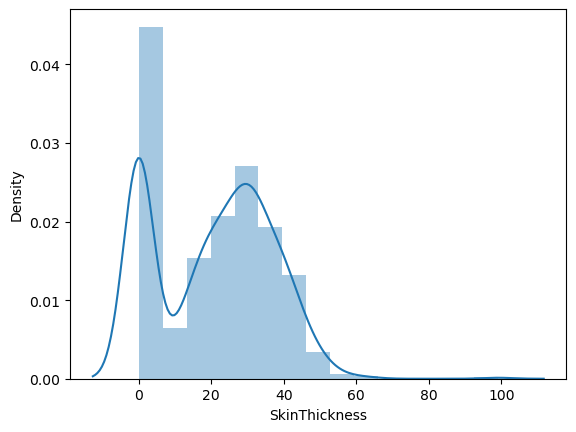

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


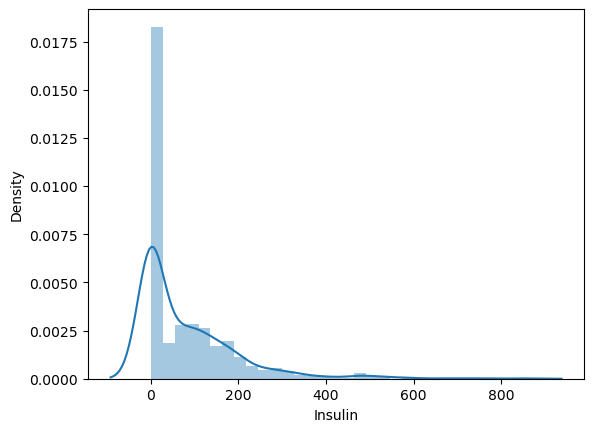

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


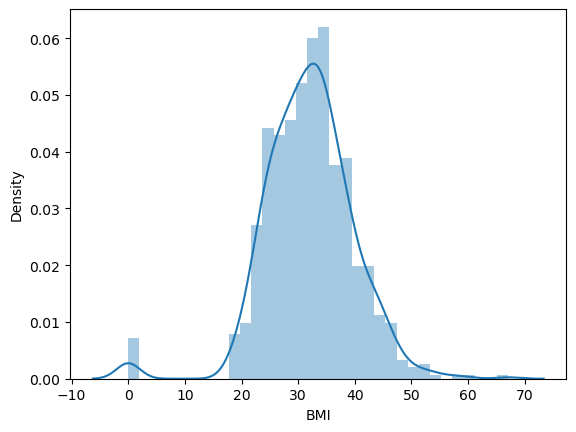

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


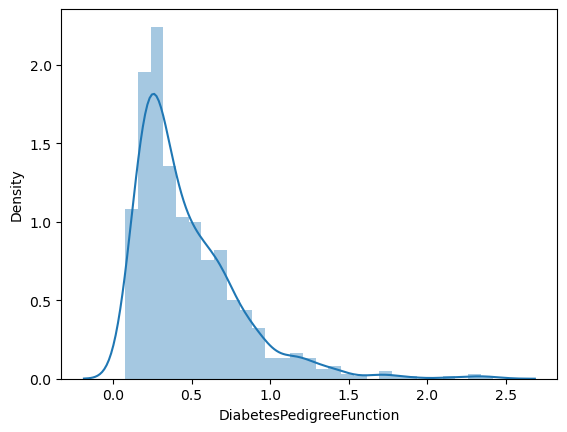

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


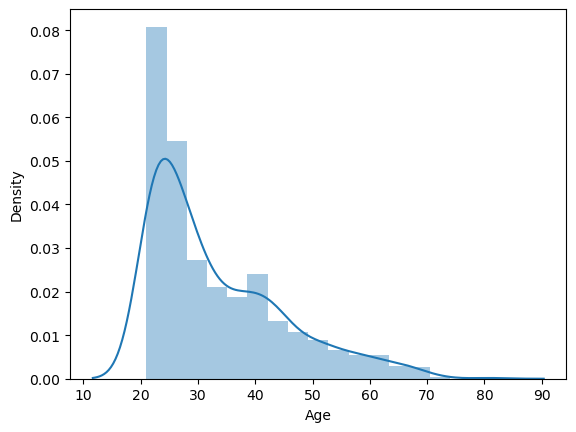

In [11]:
# Show the Distribution Plot for each columns having Outliers:
Outliers_df = Diabetes_df.drop(columns='Outcome')
for i in Outliers_df.columns:
    sns.distplot(Outliers_df[i])
    plt.show()

## 2.3 Heatmap of Features:

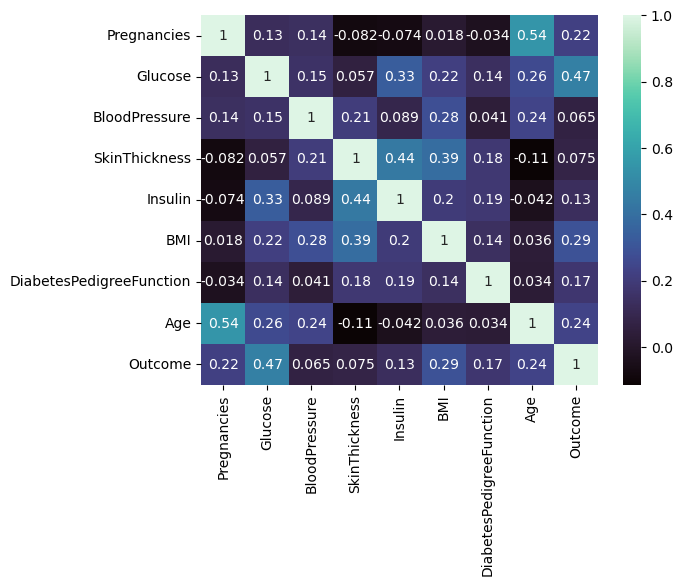

In [12]:
correlation = Diabetes_df.corr()
sns.heatmap(correlation,cmap='mako',annot=True)
plt.show()

- In terms of multicollinearity 'Age-Pregnancies' shows moderate relation between them!

## 2.4 Handeling Outliers:

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


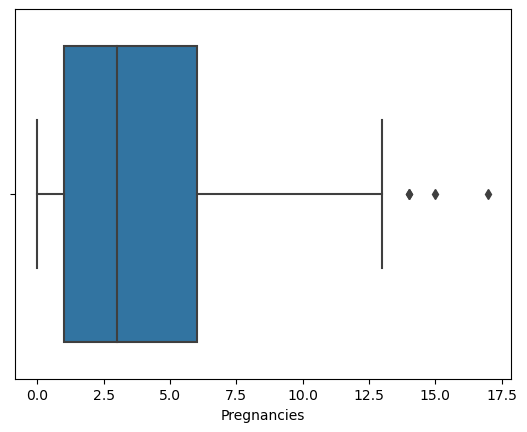

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


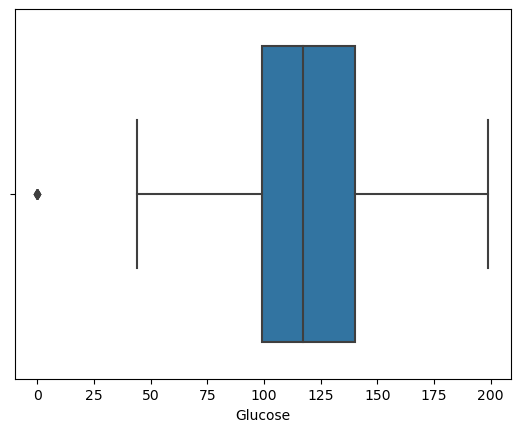

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


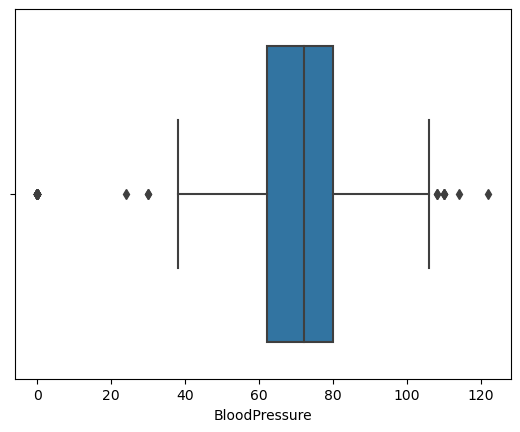

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


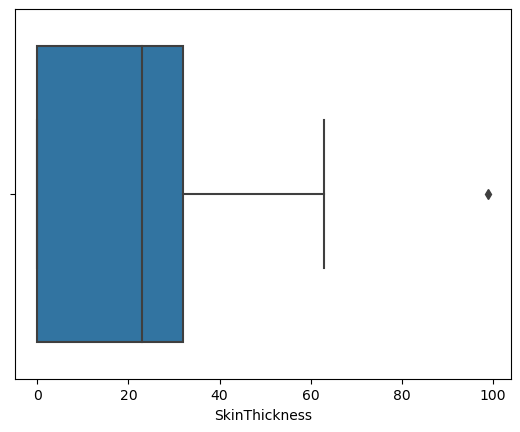

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


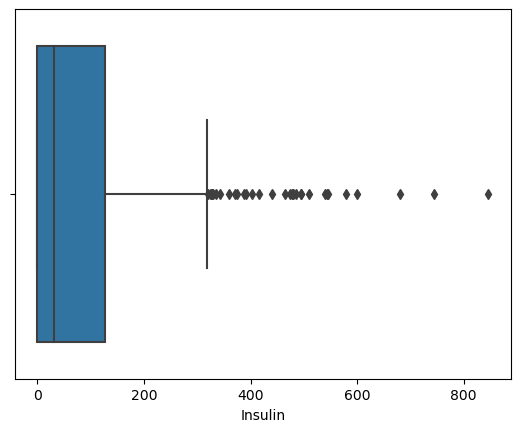

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


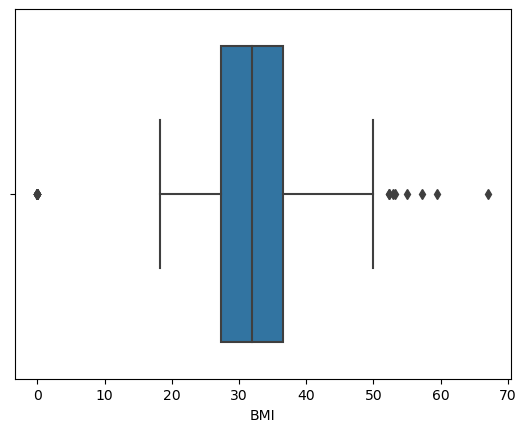

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


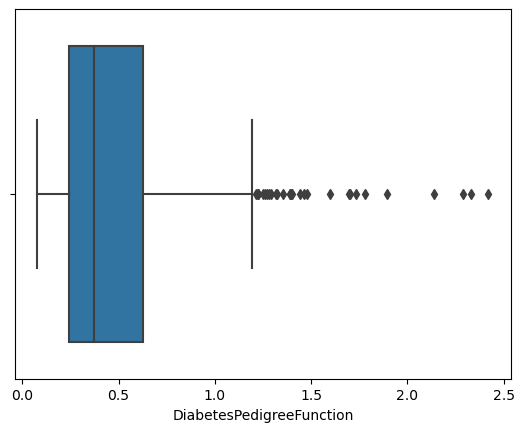

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


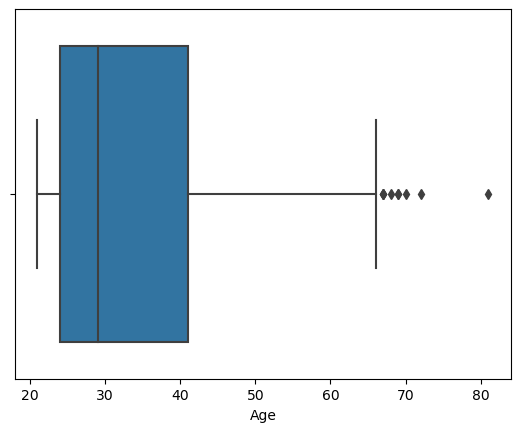

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


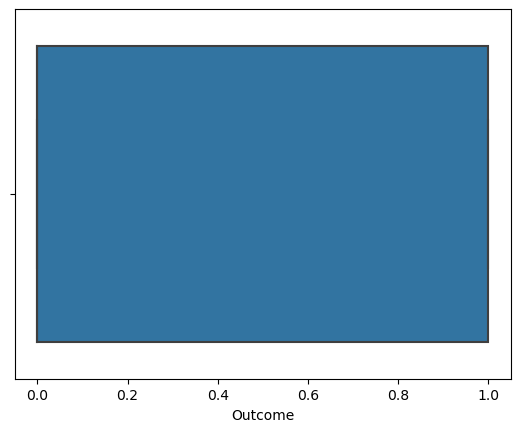

In [13]:
for i in Diabetes_df.columns:
    sns.boxplot(Diabetes_df[i])
    plt.show()

- So the columns 'Pregnancies','Glucose','Blood Pressure','Skin Thickness','Insulin','BMI','DiabetesPedigreeFunction','Age have Outliers.

# 3. Treatment of Outliers:

### 'Pregnancies'-

In [14]:
# Treating Outliers for column 'Pregnancies' using IQR method: (Outliers_df = 768X8)
Q1 = Outliers_df['Pregnancies'].quantile(0.25)
Q3 = Outliers_df['Pregnancies'].quantile(0.75)
IQR = Q3-Q1
Upper_fence = Q3+1.5*IQR
Lower_fence = Q1-1.5*IQR
print(f'The upper_fence is {Upper_fence} and Lower_fence is {Lower_fence}')

The upper_fence is 13.5 and Lower_fence is -6.5


In [15]:
# Show Outliers:
Outliers_df[Outliers_df['Pregnancies']>Upper_fence]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
159,17,163,72,41,114,40.9,0.817,47
298,14,100,78,25,184,36.6,0.412,46
455,14,175,62,30,0,33.6,0.212,38


In [16]:
#Treating Using Capping Method:
Outliers_df['Pregnancies'] = np.where(Outliers_df['Pregnancies']>Upper_fence,Upper_fence,Outliers_df['Pregnancies'])
Outliers_df['Pregnancies'].describe().T

count    768.000000
mean       3.837240
std        3.344157
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       13.500000
Name: Pregnancies, dtype: float64

### 'Glucose'-

In [17]:
# Treating Outliers for column 'Glucose' using IQR method: (Outliers_df = 768X8)
Q1 = Outliers_df['Glucose'].quantile(0.25)
Q3 = Outliers_df['Glucose'].quantile(0.75)
IQR = Q3-Q1
Upper_Glu = Q3+1.5*IQR
Lower_Glu = Q1-1.5*IQR
print(f'The upper_fence is {Upper_Glu} and Lower_fence is {Lower_Glu}')

The upper_fence is 202.125 and Lower_fence is 37.125


In [18]:
# Show Outliers:
Outliers_df[(Outliers_df['Glucose']>Upper_Glu)|(Outliers_df['Glucose']<Lower_Glu)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
75,1.0,0,48,20,0,24.7,0.140,22
182,1.0,0,74,20,23,27.7,0.299,21
342,1.0,0,68,35,0,32.0,0.389,22
349,5.0,0,80,32,0,41.0,0.346,37
502,6.0,0,68,41,0,39.0,0.727,41


In [19]:
#Treating Using Capping Method:
Outliers_df['Glucose'] = np.where(Outliers_df['Glucose']>Upper_Glu,Upper_Glu,
                                 np.where(Outliers_df['Glucose']<Lower_Glu,Lower_Glu,Outliers_df['Glucose']))
Outliers_df['Glucose'].describe().T

count    768.000000
mean     121.136230
std       31.187468
min       37.125000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

### 'BloodPresure'

In [20]:
# Treating Outliers for column 'BloodPressure' using IQR method: (Outliers_df = 768X8)
Q1 = Outliers_df['BloodPressure'].quantile(0.25)
Q3 = Outliers_df['BloodPressure'].quantile(0.75)
IQR = Q3-Q1
Upper_Blo = Q3+1.5*IQR
Lower_Blo = Q1-1.5*IQR
print(f'The upper_fence is {Upper_Blo} and Lower_fence is {Lower_Blo}')

The upper_fence is 107.0 and Lower_fence is 35.0


In [21]:
# Show Outliers:
Outliers_df[(Outliers_df['BloodPressure']>Upper_Blo)|(Outliers_df['BloodPressure']<Lower_Blo)] #(45X8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
7,10.0,115.0,0,0,0,35.3,0.134,29
15,7.0,100.0,0,0,0,30.0,0.484,32
18,1.0,103.0,30,38,83,43.3,0.183,33
43,9.0,171.0,110,24,240,45.4,0.721,54
49,7.0,105.0,0,0,0,0.0,0.305,24
60,2.0,84.0,0,0,0,0.0,0.304,21
78,0.0,131.0,0,0,0,43.2,0.270,26
81,2.0,74.0,0,0,0,0.0,0.102,22
84,5.0,137.0,108,0,0,48.8,0.227,37
106,1.0,96.0,122,0,0,22.4,0.207,27


In [22]:
#Treating Using Capping Method:
Outliers_df['BloodPressure'] = np.where(Outliers_df['BloodPressure']>Upper_Blo,Upper_Blo,
                                 np.where(Outliers_df['BloodPressure']<Lower_Blo,Lower_Blo,Outliers_df['BloodPressure']))
Outliers_df['BloodPressure'].describe().T

count    768.000000
mean      70.684896
std       14.197239
min       35.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      107.000000
Name: BloodPressure, dtype: float64

### 'SkinThickness':

In [23]:
# Treating Outliers for column 'SkinThickness' using IQR method: (Outliers_df = 768X8)
Q1 = Outliers_df['SkinThickness'].quantile(0.25)
Q3 = Outliers_df['SkinThickness'].quantile(0.75)
IQR = Q3-Q1
Upper_Ski = Q3+1.5*IQR
Lower_Ski = Q1-1.5*IQR
print(f'The upper_fence is {Upper_Ski} and Lower_fence is {Lower_Ski}')

The upper_fence is 80.0 and Lower_fence is -48.0


In [24]:
# Show Outliers:
Outliers_df[(Outliers_df['SkinThickness']>Upper_Ski)] #(1X8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
579,2.0,197.0,70.0,99,0,34.7,0.575,62


In [25]:
#Treating Using Capping Method:
Outliers_df['SkinThickness'] = np.where(Outliers_df['SkinThickness']>Upper_Ski,Upper_Ski,Outliers_df['SkinThickness'])
Outliers_df['SkinThickness'].describe().T

count    768.000000
mean      20.511719
std       15.844744
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       80.000000
Name: SkinThickness, dtype: float64

### 'Insulin' :

In [26]:
# Treating Outliers for column 'Insulin' using IQR method: (Outliers_df = 768X8)
Q1 = Outliers_df['Insulin'].quantile(0.25)
Q3 = Outliers_df['Insulin'].quantile(0.75)
IQR = Q3-Q1
Upper_Ins = Q3+1.5*IQR
Lower_Ins = Q1-1.5*IQR
print(f'The upper_fence is {Upper_Ins} and Lower_fence is {Lower_Ins}')

The upper_fence is 318.125 and Lower_fence is -190.875


In [27]:
# Show Outliers:
Outliers_df[(Outliers_df['Insulin']>Upper_Ins)] #(1X8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
8,2.0,197.0,70.0,45.0,543,30.5,0.158,53
13,1.0,189.0,60.0,23.0,846,30.1,0.398,59
54,7.0,150.0,66.0,42.0,342,34.7,0.718,42
111,8.0,155.0,62.0,26.0,495,34.0,0.543,46
139,5.0,105.0,72.0,29.0,325,36.9,0.159,28
153,1.0,153.0,82.0,42.0,485,40.6,0.687,23
186,8.0,181.0,68.0,36.0,495,30.1,0.615,60
220,0.0,177.0,60.0,29.0,478,34.6,1.072,21
228,4.0,197.0,70.0,39.0,744,36.7,2.329,31
231,6.0,134.0,80.0,37.0,370,46.2,0.238,46


In [28]:
#Treating Using Capping Method:
Outliers_df['Insulin'] = np.where(Outliers_df['Insulin']>Upper_Ins,Upper_Ins,Outliers_df['Insulin'])
Outliers_df['Insulin'].describe().T

count    768.000000
mean      73.652669
std       93.576029
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      318.125000
Name: Insulin, dtype: float64

### 'BMI' :

In [29]:
# Treating Outliers for column 'Insulin' using IQR method: (Outliers_df = 768X8)
Q1 = Outliers_df['BMI'].quantile(0.25)
Q3 = Outliers_df['BMI'].quantile(0.75)
IQR = Q3-Q1
Upper_BMI = Q3+1.5*IQR
Lower_BMI = Q1-1.5*IQR
print(f'The upper_fence is {Upper_BMI} and Lower_fence is {Lower_BMI}')

The upper_fence is 50.550000000000004 and Lower_fence is 13.35


In [30]:
# Show Outliers:
Outliers_df[(Outliers_df['BMI']>Upper_BMI)|(Outliers_df['BMI']<Lower_BMI)] #(19X8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
9,8.0,125.0,96.0,0.0,0.000,0.0,0.232,54
49,7.0,105.0,35.0,0.0,0.000,0.0,0.305,24
60,2.0,84.0,35.0,0.0,0.000,0.0,0.304,21
81,2.0,74.0,35.0,0.0,0.000,0.0,0.102,22
120,0.0,162.0,76.0,56.0,100.000,53.2,0.759,25
125,1.0,88.0,35.0,42.0,99.000,55.0,0.496,26
145,0.0,102.0,75.0,23.0,0.000,0.0,0.572,21
177,0.0,129.0,107.0,46.0,130.000,67.1,0.319,26
193,11.0,135.0,35.0,0.0,0.000,52.3,0.578,40
247,0.0,165.0,90.0,33.0,318.125,52.3,0.427,23


In [31]:
#Treating Using Capping Method:
Outliers_df['BMI'] = np.where(Outliers_df['BMI']>Upper_BMI,Upper_BMI,
                             np.where(Outliers_df['BMI']<Lower_BMI,Lower_BMI,Outliers_df['BMI']))
Outliers_df['BMI'].describe().T

count    768.000000
mean      32.125065
std        7.049584
min       13.350000
25%       27.300000
50%       32.000000
75%       36.600000
max       50.550000
Name: BMI, dtype: float64

### 'DiabetesPedigreeFunction' :

In [32]:
# Treating Outliers for column 'DiabetesPedigreeFunction' using IQR method: (Outliers_df = 768X8)
Q1 = Outliers_df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = Outliers_df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3-Q1
Upper_DPF = Q3+1.5*IQR
Lower_DPF = Q1-1.5*IQR
print(f'The upper_fence is {Upper_DPF} and Lower_fence is {Lower_DPF}')

The upper_fence is 1.2 and Lower_fence is -0.32999999999999996


In [33]:
# Show Outliers:
Outliers_df[(Outliers_df['DiabetesPedigreeFunction']>Upper_DPF)] # (29X8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0.0,137.0,40.0,35.0,168.000,43.10,2.288,33
12,10.0,139.0,80.0,0.0,0.000,27.10,1.441,57
39,4.0,111.0,72.0,47.0,207.000,37.10,1.390,56
45,0.0,180.0,66.0,39.0,0.000,42.00,1.893,25
58,0.0,146.0,82.0,0.0,0.000,40.50,1.781,44
100,1.0,163.0,72.0,0.0,0.000,39.00,1.222,33
147,2.0,106.0,64.0,35.0,119.000,30.50,1.400,34
187,1.0,128.0,98.0,41.0,58.000,32.00,1.321,33
218,5.0,85.0,74.0,22.0,0.000,29.00,1.224,32
228,4.0,197.0,70.0,39.0,318.125,36.70,2.329,31


In [34]:
#Treating Using Capping Method:
Outliers_df['DiabetesPedigreeFunction'] = np.where(Outliers_df['DiabetesPedigreeFunction']>Upper_DPF,Upper_DPF,Outliers_df['DiabetesPedigreeFunction'])
Outliers_df['DiabetesPedigreeFunction'].describe().T

count    768.000000
mean       0.458914
std        0.285596
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        1.200000
Name: DiabetesPedigreeFunction, dtype: float64

### 'AGE' :


In [35]:
# Treating Outliers for column 'Age' using IQR method: (Outliers_df = 768X8)
Q1 = Outliers_df['Age'].quantile(0.25)
Q3 = Outliers_df['Age'].quantile(0.75)
IQR = Q3-Q1
Upper_Age = Q3+1.5*IQR
Lower_Age = Q1-1.5*IQR
print(f'The upper_fence is {Upper_Age} and Lower_fence is {Lower_Age}')

The upper_fence is 66.5 and Lower_fence is -1.5


In [36]:
# Show Outliers:
Outliers_df[(Outliers_df['Age']>Upper_Age)] # (9X8)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
123,5.0,132.0,80.0,0.0,0.0,26.80,0.186,69
363,4.0,146.0,78.0,0.0,0.0,38.50,0.520,67
453,2.0,119.0,35.0,0.0,0.0,19.60,0.832,72
459,9.0,134.0,74.0,33.0,60.0,25.90,0.460,81
489,8.0,194.0,80.0,0.0,0.0,26.10,0.551,67
537,0.0,57.0,60.0,0.0,0.0,21.70,0.735,67
666,4.0,145.0,82.0,18.0,0.0,32.50,0.235,70
674,8.0,91.0,82.0,0.0,0.0,35.60,0.587,68
684,5.0,136.0,82.0,0.0,0.0,13.35,0.640,69


In [37]:
#Treating Using 'Capping' Method:
Outliers_df['Age'] = np.where(Outliers_df['Age']>Upper_Age,Upper_Age,Outliers_df['Age'])
Outliers_df['Age'].describe().T

count    768.000000
mean      33.199870
std       11.628404
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       66.500000
Name: Age, dtype: float64

### 2.5 Box Plots after Handeling the Outliers:

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


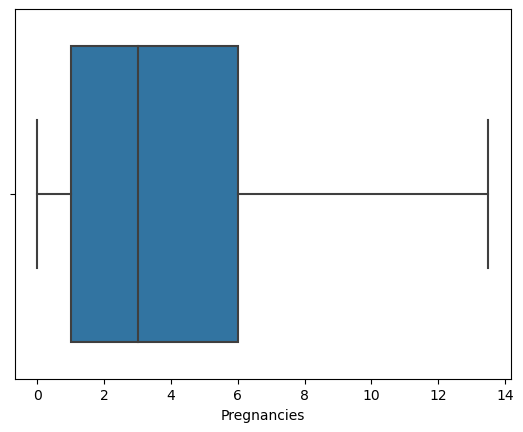

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


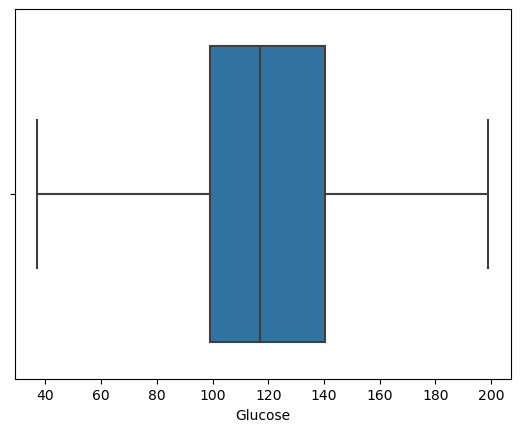

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


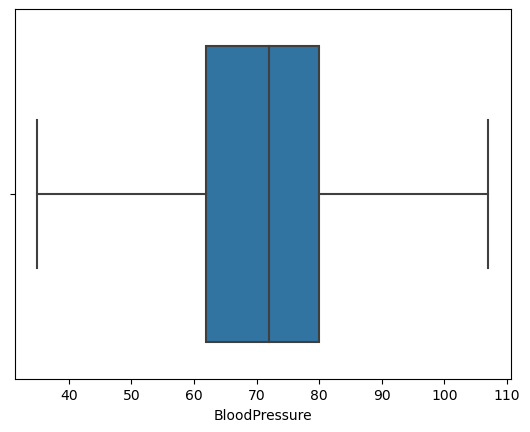

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


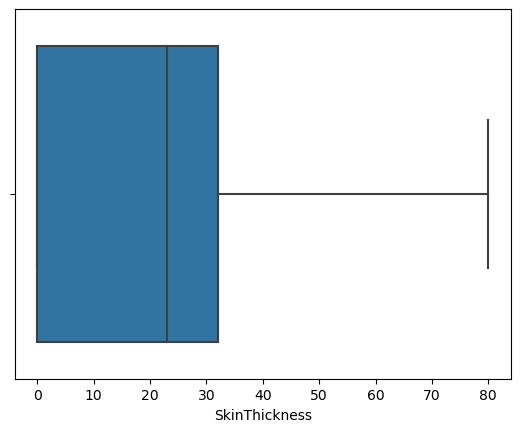

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


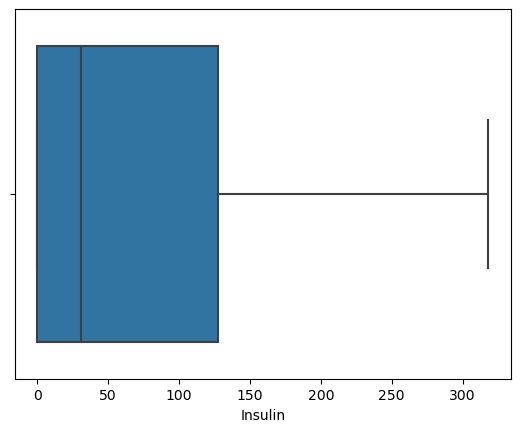

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


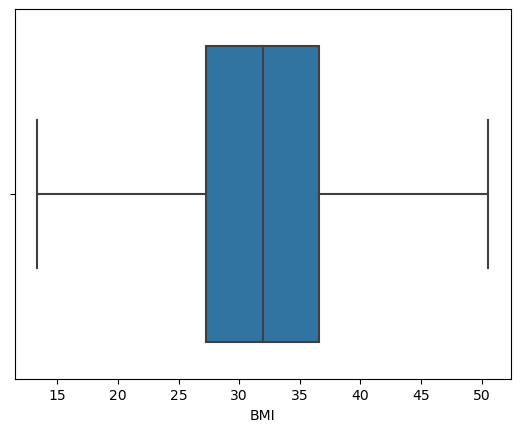

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


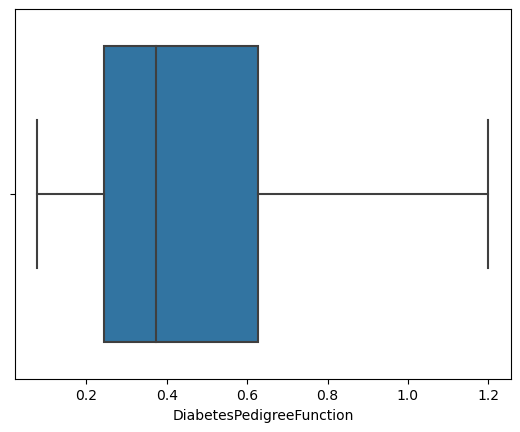

C:\Users\Home pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


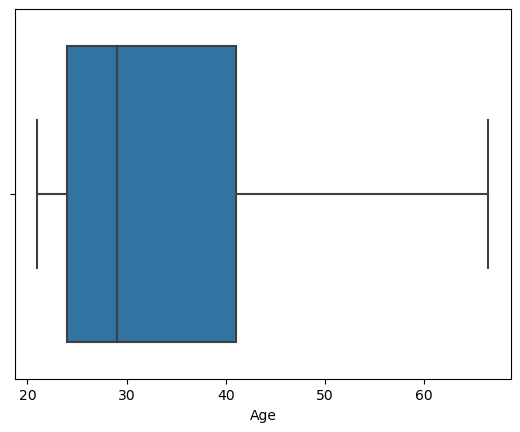

In [38]:
for i in Outliers_df.columns:
    sns.boxplot(Outliers_df[i])
    plt.show()

# 4. Splitting Dataset into Train and Test Dataset:

In [39]:
X = Outliers_df
Y = Diabetes_df['Outcome']

### Scaling The Feature Vector:

In [40]:
X_arr = StandardScaler().fit_transform(X)
X_df = pd.DataFrame(X_arr,columns=X.columns)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-1.821460e-17,1.000652,-1.148194,-0.848970,-0.250522,0.647150,2.891329
Glucose,768.0,-9.830100e-18,1.000652,-2.695505,-0.710242,-0.132711,0.613266,2.498263
BloodPressure,768.0,3.244565e-16,1.000652,-2.515148,-0.612130,0.092691,0.656548,2.559566
SkinThickness,768.0,-2.500893e-17,1.000652,-1.295388,-1.295388,0.157144,0.725526,3.756895
Insulin,768.0,2.891206e-18,1.000652,-0.787602,-0.787602,-0.461451,0.573141,2.614256
BMI,768.0,1.227678e-16,1.000652,-2.665023,-0.684893,-0.017752,0.635194,2.615324
DiabetesPedigreeFunction,768.0,-2.302845e-16,1.000652,-1.334619,-0.753876,-0.302771,0.586300,2.596563
Age,768.0,2.125036e-16,1.000652,-1.049828,-0.791671,-0.361409,0.671220,2.865555


### Train-Test Data Split:

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_arr,Y,test_size=0.2,random_state=42)

In [42]:
print(len(X))
print(len(X_train))
print(len(X_test))

768
614
154


# 5. Testing of Models:

### 1.) Logistic Regression Model:

In [77]:
from sklearn.linear_model import LogisticRegression
Logi_model = LogisticRegression()
Logi_model.fit(X_train,Y_train)

LogisticRegression()

In [78]:
# Predicting Target Values:
Y_predict = Logi_model.predict(X_test)
Y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [79]:
# Performance:
from sklearn.metrics import accuracy_score,precision_score,classification_report,\
r2_score,mean_absolute_error,mean_squared_error
#print('The R^2 score is',r2_score(Y_test,Y_predict))
print('The accuracy score is',accuracy_score(Y_test,Y_predict)) #75%

The accuracy score is 0.7532467532467533


In [46]:
cm_Logi = confusion_matrix(Y_test,Y_predict)
cm_Logi

array([[80, 19],
       [19, 36]], dtype=int64)

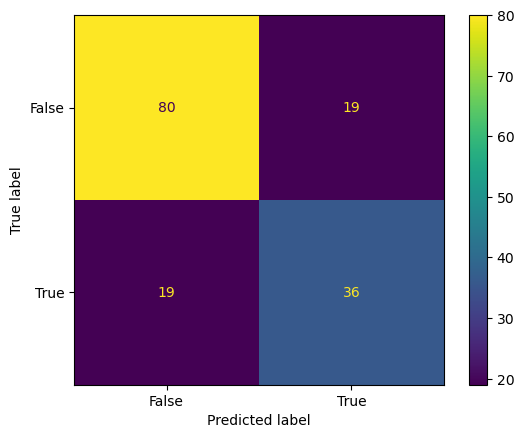

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_Logi_display = ConfusionMatrixDisplay(confusion_matrix=cm_Logi,display_labels=[False,True])
cm_Logi_display.plot()
plt.show()

### 2.) KNN Model:

In [66]:
# To find the best value of K(neighbours):
from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(Y_test,pred_i)
    error.append(mae)

## Finding best value of 'K':

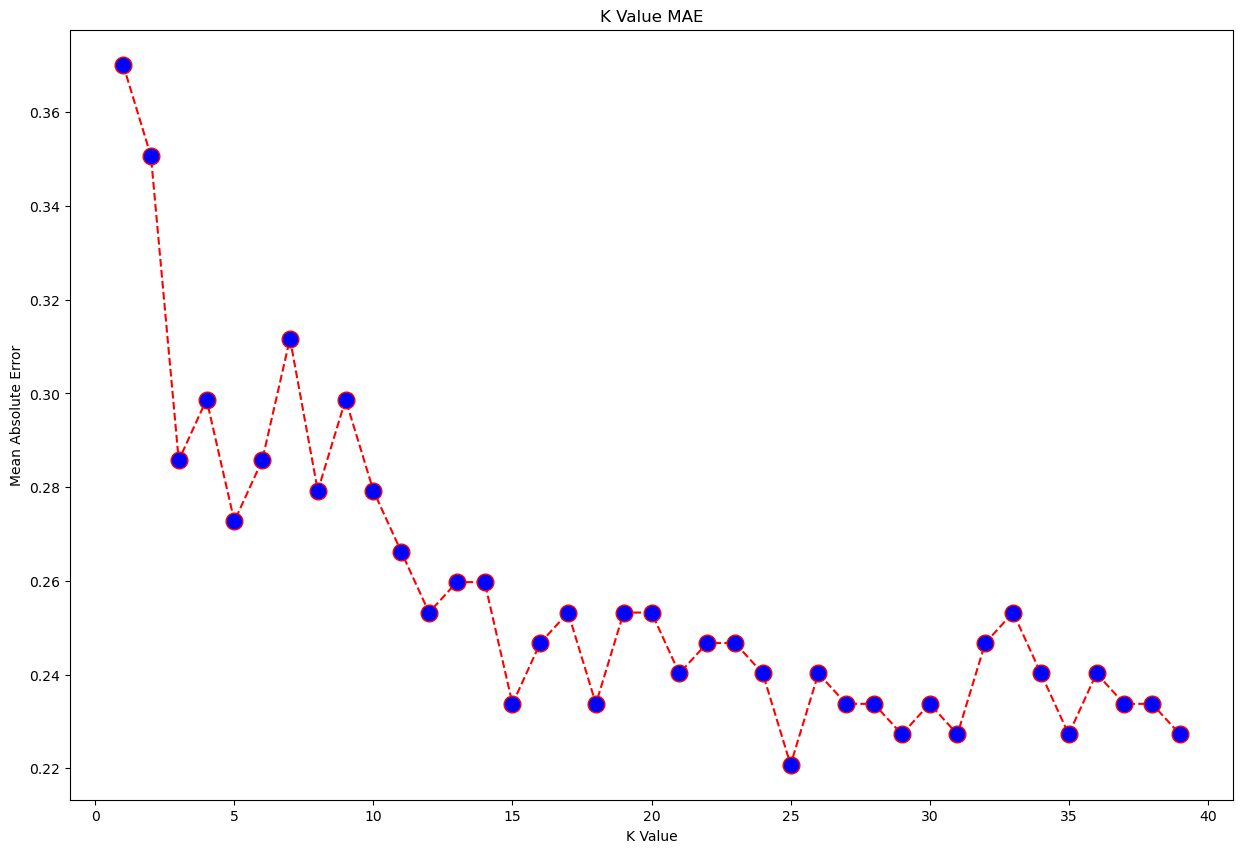

In [49]:
# plotting the error

plt.figure(figsize=(15,10))

plt.plot(range(1,40), error,color="red",
        linestyle="dashed", marker="o",
        markerfacecolor="blue", markersize=12)
plt.title("K Value MAE")
plt.xlabel("K Value")
plt.ylabel("Mean Absolute Error")
plt.show()

In [50]:
print(np.array(error).argmin())

24


In [51]:
from sklearn.neighbors import KNeighborsClassifier
K_model = KNeighborsClassifier(n_neighbors=24)
K_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=24)

In [52]:
Y_K_prediction = K_model.predict(X_test)
Y_K_prediction

C:\Users\Home pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [53]:
# Accuracy:
print('The accuracy score is',accuracy_score(Y_test,Y_K_prediction)) #76%

The accuracy score is 0.7597402597402597


In [54]:
# Confusion matrix:
cm_Knn = confusion_matrix(Y_test,Y_K_prediction)
cm_Knn

array([[90,  9],
       [28, 27]], dtype=int64)

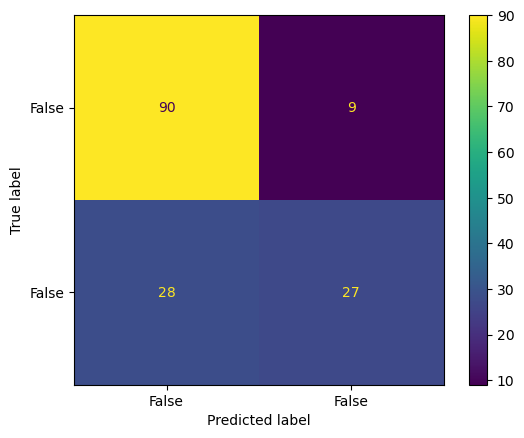

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_Knn_display = ConfusionMatrixDisplay(confusion_matrix=cm_Knn,display_labels=[False,False])
cm_Knn_display.plot()
plt.show()

### 3.) SVM Model:

In [56]:
from sklearn.svm import SVC
SVC_model = SVC()
SVC_model.fit(X_train,Y_train)

SVC()

In [57]:
# Predicting 'Target Values':
Y_SVC_predict = SVC_model.predict(X_test)
Y_SVC_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [58]:
# Accuracy:
print('The accuracy score is',accuracy_score(Y_test,Y_SVC_predict)) #72%

The accuracy score is 0.7207792207792207


In [59]:
# Confusion Matrix:
from sklearn.metrics import confusion_matrix
cm_SVC = confusion_matrix(Y_test,Y_SVC_predict)
cm_SVC

array([[79, 20],
       [23, 32]], dtype=int64)

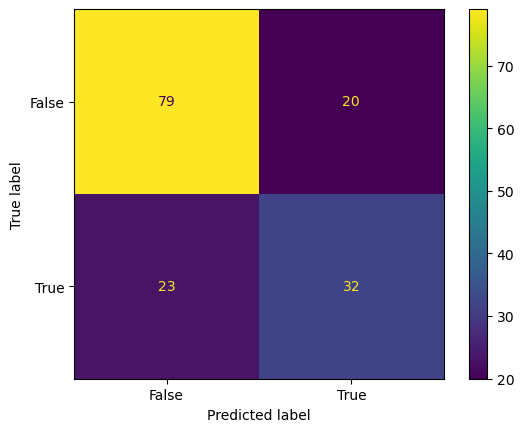

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_SVC_display = ConfusionMatrixDisplay(confusion_matrix=cm_SVC,display_labels=[False,True])
cm_SVC_display.plot()
plt.show()

# Plotting the ROC and Comparing AUC:

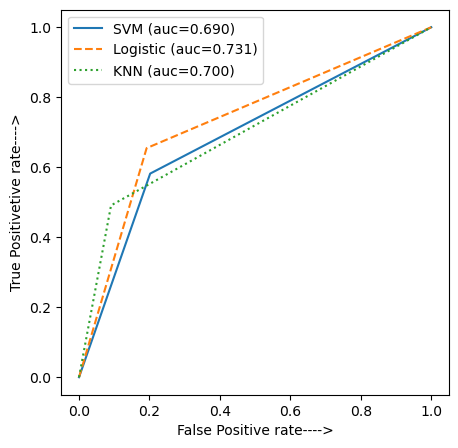

In [76]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

logistic_fpr,logistic_tpr,threshold = roc_curve(Y_test,Y_predict)
auc_logistic = auc(logistic_fpr,logistic_tpr)

svm_fpr,svm_tpr,threshold = roc_curve(Y_test,Y_SVC_predict)
auc_svm = auc(svm_fpr,svm_tpr)

knn_fpr,knn_tpr,threshold = roc_curve(Y_test,Y_K_prediction)
auc_knn = auc(knn_fpr,knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc=%.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, linestyle='--', label='Logistic (auc=%.3f)' % auc_logistic)
plt.plot(knn_fpr, knn_tpr, linestyle=':', label='KNN (auc=%.3f)' % auc_knn)


plt.xlabel("False Positive rate---->")
plt.ylabel("True Positivetive rate---->")

plt.legend()
plt.show()

## So the Performances of different Models are as follows:
- Logistic Regression = 75%
- K Nearest Neighbor = 76%
- Support Vector Machine = 72%

#### So as per my experiment 'K Nearest Neighbor' gives out the best accuracy!!!!